In [192]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import seaborn as sns

## 1) Loading Data:

In [168]:
df_educacao = pd.read_csv(r"..\Dados\Q EDU\dados_edu_2020.csv", index_col="COD MUNICIPIO")
df_final_maci = pd.read_csv(r"..\Dados\Tabela_final\tabela_final.csv", index_col="IBGE7")

In [126]:
df_final_maci.drop(columns=['DIST_EF_PUB', 'DIST_EM_PUB',
                            'IDEB_AI', 'IDEB_AF',
                            'DOCSUP_EF_PUB', 'DOCSUP_EM_PUB', "Unnamed: 0"], inplace=True)

In [169]:
df_final_maci.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1261 entries, 2700300 to 2807402
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1261 non-null   int64  
 1   UF                   1261 non-null   object 
 2   NOME                 1261 non-null   object 
 3   LATITUDE             1261 non-null   float64
 4   LONGITUDE            1261 non-null   float64
 5   PREC_MED             1261 non-null   float64
 6   TEMP_MED             1261 non-null   float64
 7   QUAL_MED_AGUA        1261 non-null   float64
 8   DIST_CORPO_AGUA      1261 non-null   float64
 9   DIST_EF_PUB          1261 non-null   float64
 10  DIST_EM_PUB          1261 non-null   float64
 11  IDEB_AI              1261 non-null   float64
 12  IDEB_AF              1261 non-null   float64
 13  DOCSUP_EF_PUB        1261 non-null   float64
 14  DOCSUP_EM_PUB        1261 non-null   float64
 15  TXNASC7C             1261 non-null

In [170]:
df_educacao.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1171 entries, 2700102 to 2807402
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nome             1171 non-null   object 
 1   TOT_ESC_POR_POP  1171 non-null   float64
 2   TOT_MAT_POR_POP  1171 non-null   float64
 3   PMATPUB_EF       1171 non-null   float64
 4   PMATPUB_EM       1171 non-null   float64
dtypes: float64(4), object(1)
memory usage: 54.9+ KB


In [171]:
df = df_final_maci.merge(df_educacao, how="inner", left_index=True, right_index=True)

In [172]:
lista_colunas = [coluna for coluna in df.columns if (df[coluna].dtype == 'float64')&(coluna not in ['LATITUDE', 'LONGITUDE'])]

In [173]:
df_final_merged = df[lista_colunas]

In [174]:
df_final_merged

,PREC_MED,TEMP_MED,QUAL_MED_AGUA,DIST_CORPO_AGUA,DIST_EF_PUB,DIST_EM_PUB,IDEB_AI,IDEB_AF,DOCSUP_EF_PUB,DOCSUP_EM_PUB,...,T_BANAGUA,T_DENS,T_LIXO,T_LUZ,AGUA_ESGOTO,PAREDE,TOT_ESC_POR_POP,TOT_MAT_POR_POP,PMATPUB_EF,PMATPUB_EM
2700300,2.263969,26.327873,62.439167,42.035186,28.006125,42.522954,4.658296,3.683754,54.40,56.96,...,82.16,30.83,97.38,99.56,12.38,0.96,0.000433,0.245423,0.7387,0.7645
2700706,1.953488,27.754398,65.300843,24.642419,30.831978,36.687844,4.495362,3.590319,12.62,41.94,...,58.61,41.21,88.09,98.93,18.22,5.50,0.001200,0.384829,0.8744,1.0000
2700904,1.953488,27.754398,65.300843,3.297594,34.847867,52.813493,4.083426,3.171860,27.12,31.84,...,36.42,39.22,99.16,97.68,17.30,12.01,0.002235,0.298063,1.0000,1.0000
2701209,2.296316,25.157018,65.300843,58.541833,38.654232,43.228540,4.104964,3.317861,49.04,45.22,...,18.47,32.14,87.36,98.30,60.86,8.89,0.001102,0.419781,0.9051,0.9718
2701605,1.516842,27.046445,66.893107,68.942666,31.898935,36.839351,4.667102,3.633118,20.84,32.34,...,18.20,44.21,93.07,96.97,40.57,2.52,0.002032,0.366838,1.0000,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2806008,0.984831,26.969830,64.911294,1.388835,32.467580,40.276968,4.230984,3.565478,64.68,77.28,...,80.88,19.75,98.78,99.49,14.85,3.47,0.000692,0.211261,0.7698,1.0000
2807006,1.894041,25.452166,64.911294,16.508752,32.107015,47.482277,3.915938,3.184283,62.08,66.38,...,61.09,28.75,95.20,99.04,24.96,10.33,0.002280,0.196098,1.0000,1.0000
2807105,2.499337,24.440877,65.088090,2.685846,35.640213,43.864958,4.286000,3.467918,61.38,82.96,...,60.38,24.58,97.96,98.62,30.64,4.38,0.001108,0.254938,0.8509,0.9236
2807303,4.713677,26.562289,64.553680,4.298665,29.921124,45.640696,4.361086,3.524588,45.66,71.74,...,89.06,31.18,99.05,99.44,5.01,2.05,0.001539,0.222838,1.0000,1.0000


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1170 entries, 2700300 to 2807402
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1170 non-null   int64  
 1   UF                   1170 non-null   object 
 2   NOME                 1170 non-null   object 
 3   LATITUDE             1170 non-null   float64
 4   LONGITUDE            1170 non-null   float64
 5   PREC_MED             1170 non-null   float64
 6   TEMP_MED             1170 non-null   float64
 7   QUAL_MED_AGUA        1170 non-null   float64
 8   DIST_CORPO_AGUA      1170 non-null   float64
 9   DIST_EF_PUB          1170 non-null   float64
 10  DIST_EM_PUB          1170 non-null   float64
 11  IDEB_AI              1170 non-null   float64
 12  IDEB_AF              1170 non-null   float64
 13  DOCSUP_EF_PUB        1170 non-null   float64
 14  DOCSUP_EM_PUB        1170 non-null   float64
 15  TXNASC7C             1170 non-null

## 2) Preprocessamento

### 2.1) StandardScaler

In [176]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_final_merged)

In [177]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = df_final_merged.columns

### 2.2) Aplicando PCA

In [178]:
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df_scaled)

In [180]:
print("Número de componentes para 0.95 de variância", df_pca.shape)

Número de componentes para 0.95 de variância (1170, 28)


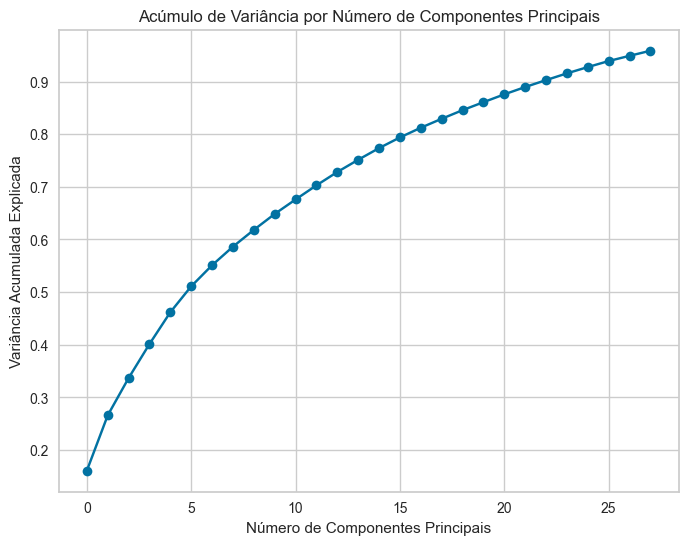

In [181]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
# Crie um gráfico para visualizar o acúmulo de variância
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Acumulada Explicada')
plt.title('Acúmulo de Variância por Número de Componentes Principais')
plt.grid(True)
plt.show()


## Clustering

In [182]:
tsne = TSNE(n_components=2, random_state=42)
df_components = tsne.fit_transform(df_pca)

In [191]:
def plot_clusters(df, df_components, clusters):
    df[['COMPONENT1', 'COMPONENT2']] = df_components
    df['CLUSTER'] = clusters

    actual_cities = df[['NOME', 'COMPONENT1', 'COMPONENT2', 'CLUSTER']].loc[df['NOME'].isin(['MAURITI', 'SÃO JOSÉ DA TAPERA', 'BUÍQUE', 'INAJÁ'])]

    print(actual_cities)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='COMPONENT1', y='COMPONENT2', hue='CLUSTER', palette='Set2')
    sns.scatterplot(data=actual_cities, x='COMPONENT1', y='COMPONENT2', marker = 'X', color='black', s=100, label='Cidades atuais')
    for i, row in actual_cities.iterrows():
        plt.text(row['COMPONENT1'] + 0.1, row['COMPONENT2'], row['NOME'], fontsize=12)
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.title('Visualização dos Clusters')
    plt.legend(title='Cluster', loc='upper right')
    plt.grid(True)
    plt.show()

### 2.3) Kmeans:

#### 2.3.1) Elbow curve

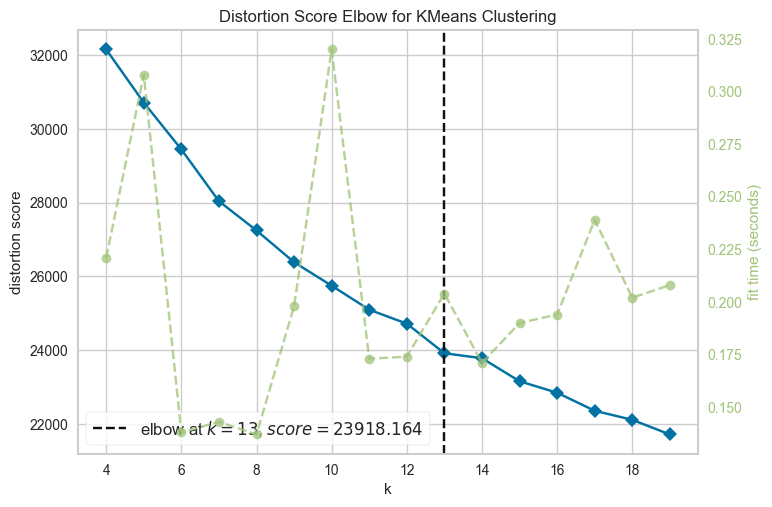

In [184]:
model = KMeans(n_init=20, random_state=42)
visualizer = KElbowVisualizer(model, k=(4,20))
visualizer.fit(df_pca)        # Fit the data to the visualizer
visualizer.show();        # Finalize and render the figure

#### 2.3.2) Silhouette_score

In [185]:
def best_silhuet_score(data):
    best_silhuet = 0
    best_k = 0
    for i in range(2, 21):
        kmean = KMeans(n_clusters=i, n_init=20, random_state=42)
        centroids = kmean.fit_transform(df_pca)
        score = silhouette_score(df_pca, kmean.labels_)
        if score > best_silhuet:
            best_silhuet = score
            best_k = i
        
    return best_k, best_silhuet

In [186]:
best_k, best_silhuet = best_silhuet_score(df_pca)

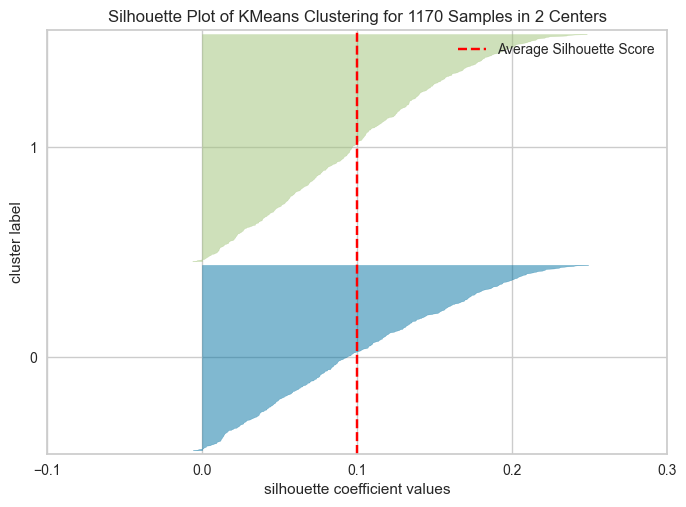

Silhouette avg: 0.09988726208046901


In [187]:
kmean = KMeans(n_clusters=best_k, n_init=20, random_state=42)
visualizer = SilhouetteVisualizer(kmean, colors="yellowbrick")
visualizer.fit(df_pca)
visualizer.show();
print("Silhouette avg:", visualizer.silhouette_score_)

#### 2.3.3) Métricas finais:

Silhouette Score:  0.0999
Davies-Bouldin Score:  2.7718
Calinski-Harabasz Index:  132.4131
                       NOME  COMPONENT1  COMPONENT2  CLUSTER
2708402  SÃO JOSÉ DA TAPERA  -15.983264  -10.301717        1
2308104             MAURITI   13.689244  -29.132555        0
2602803              BUÍQUE  -11.121942   -7.928653        1
2607000               INAJÁ  -22.097145   -6.207173        1


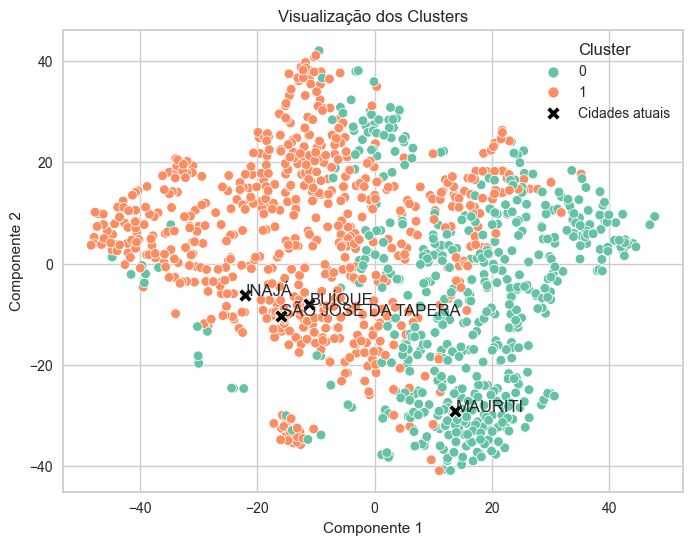

In [190]:
kmeans = KMeans(best_k, random_state = 42, n_init=20)
clusters = kmeans.fit_predict(df_pca)
print('Silhouette Score: ',round(silhouette_score(df_pca, clusters), 4))
print('Davies-Bouldin Score: ',round(davies_bouldin_score(df_pca, clusters), 4))
print('Calinski-Harabasz Index: ',round(calinski_harabasz_score(df_pca, clusters), 4))
plot_clusters(df, df_components, clusters)

### 2.4) Hirarchical clustering:

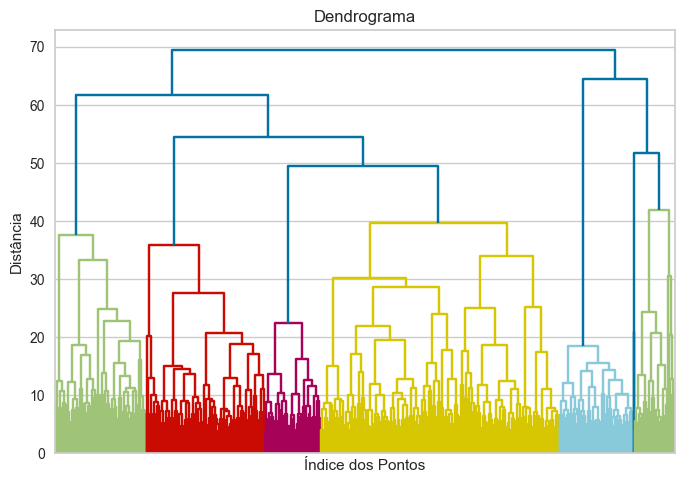

In [193]:
linkage_matrix = linkage(df_pca, method='ward')

plt.figure()
dendrogram(linkage_matrix)
plt.title('Dendrograma')
plt.xticks([])
plt.xlabel('Índice dos Pontos')
plt.ylabel('Distância')
plt.show()

Silhouette Score:  0.0546
Davies-Bouldin Score:  2.6511
Calinski-Harabasz Index:  70.4794
                       NOME  COMPONENT1  COMPONENT2  CLUSTER
2708402  SÃO JOSÉ DA TAPERA  -15.983264  -10.301717        1
2308104             MAURITI   13.689244  -29.132555        2
2602803              BUÍQUE  -11.121942   -7.928653        1
2607000               INAJÁ  -22.097145   -6.207173        1


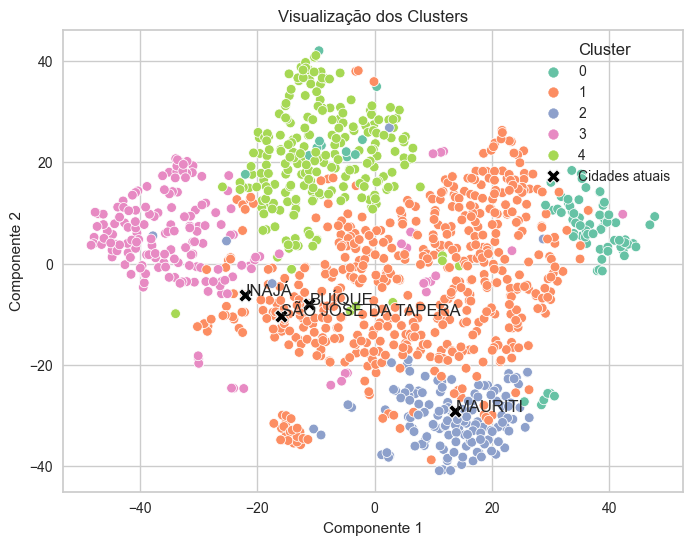

In [194]:
hclustering = AgglomerativeClustering(n_clusters=5)
clusters = hclustering.fit_predict(df_pca)
print('Silhouette Score: ',round(silhouette_score(df_pca, clusters),4))
print('Davies-Bouldin Score: ',round(davies_bouldin_score(df_pca, clusters),4))
print('Calinski-Harabasz Index: ',round(calinski_harabasz_score(df_pca, clusters),4))
plot_clusters(df, df_components, clusters)